# 1 Introdução

Neste notebook, vamos explorar técnicas de criação de features derivadas, especificamente feature crossing e feature transformation. Estas técnicas são fundamentais para melhorar o desempenho dos modelos de Machine Learning.

# 2 Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 3 Carregamento do Dataset

## 3.1 Descrição do Dataset

Para este exemplo, utilizaremos o famoso dataset "SMS Spam Collection Dataset". Este dataset contém mensagens SMS rotuladas como spam ou ham (não-spam) e é amplamente utilizado em estudos de machine learning para tarefas de classificação de texto.

- Principais Características do Dataset:
    - label: Rótulo da mensagem (spam ou ham).
    - message: Conteúdo da mensagem SMS.

- Importância das Variáveis:
    - Rótulo (label): Indica se a mensagem é spam ou não, sendo crucial para a tarefa de classificação.
    - Mensagem (message): O texto da mensagem que será processado e analisado para determinar se é spam ou ham.

- Fonte do Dataset

    - O dataset está disponível no repositório do GitHub:
    - Para carregar o dataset em um DataFrame do pandas:

        import pandas as pd

        url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"


        df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])


## 3.2 Carregamento do Dataset

In [2]:
# Carregar o dataset usando pandas
df = pd.read_csv("datasets/sms_spam_collection.csv", sep=',', header=None, names=['label', 'message'])

# Mostrando as primeiras linhas do dataset
df.head()

,label,message
0,label,message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


# 4 Análise Exploratória

In [3]:
# Visualizando informações gerais sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5573 non-null   object
 1   message  5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
# Visualizando estatísticas descritivas
df.describe(include='all')

,label,message
count,5573,5573
unique,3,5170
top,ham,"Sorry, I'll call later"
freq,4825,30


# 5 Pré-processamento do Texto

Nesta etapa, realizaremos o pré-processamento do texto, como remoção de pontuações, conversão para minúsculas, etc.

In [5]:
df_clean = df
df_clean['message_clean'] = df_clean['message'].str.replace(r'[^\w\s]', '', regex=True).str.lower()
df_clean

,label,message,message_clean
0,label,message,message
1,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
2,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
4,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,this is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?,will ü b going to esplanade fr home
5570,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggest...
5571,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


# 6 Vetorização do Texto

A vetorização do texto é essencial em NLP porque os modelos de machine learning não podem processar texto diretamente; eles exigem dados numéricos. Vetorização converte o texto em uma representação numérica, permitindo que os algoritmos de machine learning possam trabalhar com os dados textuais.

## 6.1 Bag-of-Words (BoW)

O Bag of Words é uma técnica de vetorização que converte texto em uma matriz de frequências de palavras. Cada documento é representado por um vetor onde cada posição corresponde a uma palavra do vocabulário e o valor é o número de vezes que essa palavra aparece no documento. Ele captura a presença e a frequência de palavras, mas ignora a ordem e o contexto das palavras.

In [6]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(df_clean['message_clean'])

## 6.2 TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF é uma técnica de vetorização que pondera a frequência das palavras em um documento em relação a quantas vezes essas palavras aparecem em todos os documentos. A fórmula combina a frequência da palavra em um documento (TF) com a frequência inversa em todos os documentos (IDF), destacando palavras importantes (relevantes) e diminuindo a importância de palavras muito comuns (menos discriminativas).

In [7]:
vectorizer_tfidf = TfidfVectorizer()
X_tfidf = vectorizer_tfidf.fit_transform(df_clean['message_clean'])

# 7 Divisão dos Dados

Vamos dividir os dados em conjuntos de treino e teste.

In [8]:
y = df_clean['label']
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 8 Treinamento e Avaliação dos Modelos

## 8.1 Modelo com Bag-of-Words

Acurácia do modelo Bag-of-Words: 0.9766816143497757


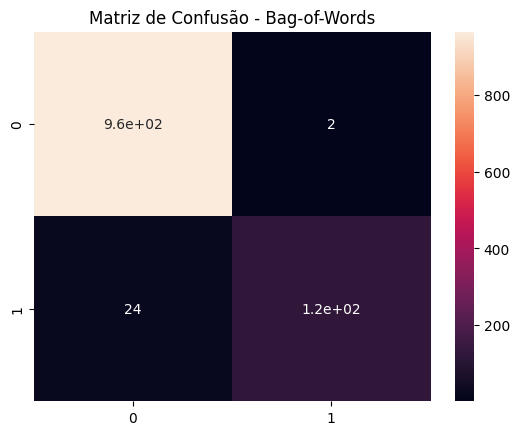

In [9]:
# Treinamento
model_bow = LogisticRegression()
model_bow.fit(X_train_bow, y_train)

# Predição
y_pred_bow = model_bow.predict(X_test_bow)

# Resultado
acc_bow = accuracy_score(y_test, y_pred_bow)
print(f'Acurácia do modelo Bag-of-Words: {acc_bow}')

# Apresentação do resultado em formato gráfico
cm_bow = confusion_matrix(y_test, y_pred_bow)
sns.heatmap(cm_bow, annot=True)
plt.title('Matriz de Confusão - Bag-of-Words')
plt.show()

## 8.2 Modelo com TF-IDF

Acurácia do modelo TF-IDF: 0.9668161434977578


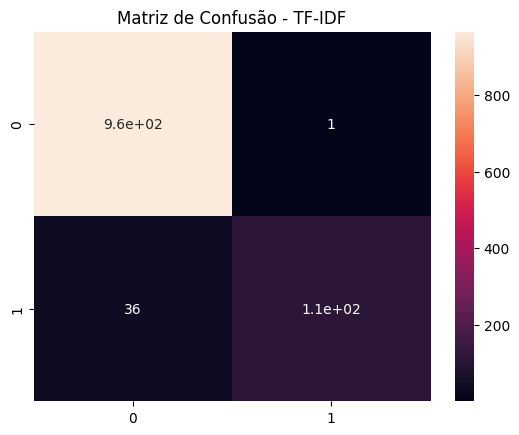

In [10]:
# Treinamento
model_tfidf = LogisticRegression()
model_tfidf.fit(X_train_tfidf, y_train)

# Predição
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

# Resultado
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f'Acurácia do modelo TF-IDF: {acc_tfidf}')

# Apresentação do resultado em formato gráfico
cm_tfidf = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm_tfidf, annot=True)
plt.title('Matriz de Confusão - TF-IDF')
plt.show()